## 導入檔案

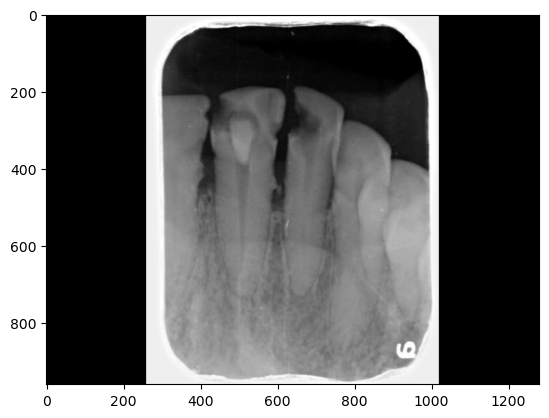

['Alveolar_bone' 'Background' 'Caries' 'Dentin' 'Enamel' 'Pulp'
 'Restoration']


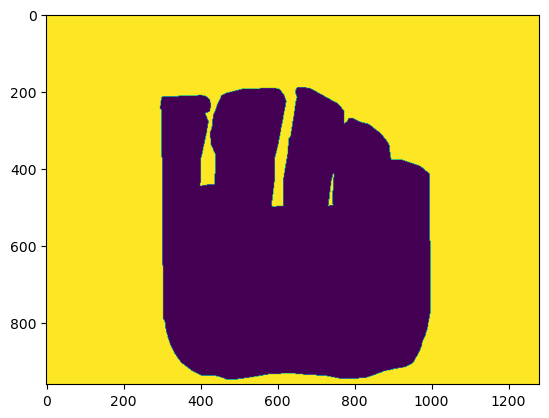

In [1]:
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
#given the path
file_folder = r'C:\Users\SSTek\Desktop\LianChia\test\imgv0.2'
file_name='caries-0.6741573-260-760_1_2022052768'
mask_path=file_folder+'/'+file_name+'.npy'
img_path=file_folder+'/'+file_name+'.png'
meta_label_path=file_folder+'/'+file_name+'.json'
#load file
mask_label=np.load(mask_path)
img=cv2.imread(img_path)
with open(meta_label_path, 'r') as f:
    label_dict=json.load(f)


plt.imshow(img)
plt.show()
print(np.unique(list(label_dict.values())))
for label_name in set(label_dict.values()):
    if label_name=='Background':
        label_value_list=[key for key, value in label_dict.items() if value == label_name]
        mask=np.zeros((img.shape[0],img.shape[1]))
        for label_value in label_value_list:
            mask[mask_label==int(label_value)]=255
            #print(label_value)
        plt.imshow(mask)
    plt.show()

## 生成驗證集遮罩 作為IOU的檢驗

處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\processedv0.2\processed_caries-0.845815-33-1214_1_2022041830.png
生成並保存反轉遮罩圖片: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\processedv0.2\background_caries-0.845815-33-1214_1_2022041830.png


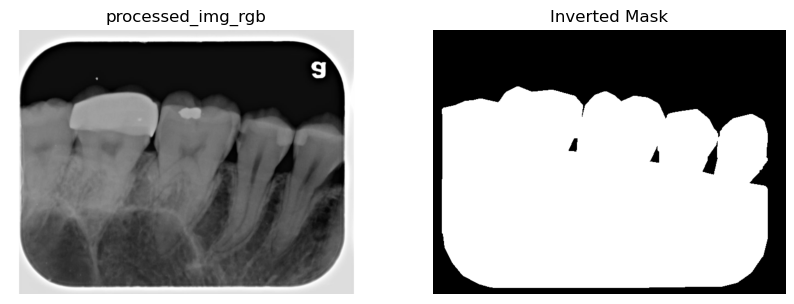

處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\processedv0.2\processed_caries-0.6741573-260-760_1_2022052768.png
生成並保存反轉遮罩圖片: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\processedv0.2\background_caries-0.6741573-260-760_1_2022052768.png
處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\processedv0.2\processed_caries-0.8304498-273-734_1_2022041847.png
生成並保存反轉遮罩圖片: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\processedv0.2\background_caries-0.8304498-273-734_1_2022041847.png
處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\processedv0.2\processed_caries-0.8421053-22-1236_0_2022052776.png
生成並保存反轉遮罩圖片: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\processedv0.2\background_caries-0.8421053-22-1236_0_2022052776.png
處理並保存圖片: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\processedv0.2\processed_caries-0.8480566-33-1214_0_2022042506.png
生成並保存反轉遮罩圖片: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\processedv0.2\background_caries-0.8480566-33-1214_0_2022042506.png
處理並保存圖片: C:\Users\SS

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import natsort
import json

def load_images_from_folder(folder_path):
    file_names = [f for f in os.listdir(folder_path) if f.lower().endswith('.png')]
    sorted_file_names = natsort.natsorted(file_names)
    images = []
    for file_name in sorted_file_names:
        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
        else:
            print(f"無法讀取圖片: {img_path}")
    return images, sorted_file_names

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    if img is None:
        img = cv2.imdecode(np.fromfile(file=file_path, dtype=np.uint8), cv2.IMREAD_COLOR)
    return img

def process_image(img):
    height, width, _ = img.shape
    black_threshold = 50
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([black_threshold, black_threshold, black_threshold])
    mask_black = cv2.inRange(img, lower_black, upper_black)

    left_black_mask = np.all(mask_black == 255, axis=0)
    right_black_mask = np.all(mask_black == 255, axis=0)[::-1]

    left_cut = np.argmax(left_black_mask == False)
    right_cut = np.argmax(right_black_mask == False)

    img[:, :left_cut] = 255
    img[:, width-right_cut:] = 255

    return img, left_cut, right_cut

def create_new_image(img,mask_binary, left_cut, right_cut):
    height, width, _ = img.shape

    new_img = np.zeros((height, width, 3), dtype=np.uint8)

    new_img[mask_binary == 0] = [255, 255, 255]

    new_img[:, :left_cut] = 255
    new_img[:, width-right_cut:] = 255

    return new_img

input_dir = r'C:\Users\SSTek\Desktop\LianChia\test\imgv0.2'
processed_dir = os.path.join(input_dir, 'processedv0.2')
os.makedirs(processed_dir, exist_ok=True)
#input_dir 之下建立processed資料夾作為輸出


images, file_names = load_images_from_folder(input_dir)

if len(images) == 0:
    raise ValueError("未能從指定的資料夾讀取到圖片。")
displayed = False # 是否顯示圖片
for img, file_name in zip(images, file_names):
    processed_img, left_cut, right_cut = process_image(img)
    output_path = os.path.join(processed_dir, f'processed_{file_name}')
    cv2.imwrite(output_path, processed_img)
    print(f"處理並保存圖片: {output_path}")

    processed_img_rgb = cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB)
    file_name_without_ext = os.path.splitext(file_name)[0]
    mask_label_path = os.path.join(input_dir, file_name_without_ext + '.npy')
    json_label_path = os.path.join(input_dir, file_name_without_ext + '.json')

    if os.path.exists(mask_label_path) and os.path.exists(json_label_path):
        mask_label = np.load(mask_label_path)
        with open(json_label_path, 'r') as f:
            label_dict = json.load(f)
        # plt.imshow(processed_img_rgb)
        # plt.axis('off')
        # plt.show()
        for label_name in set(label_dict.values()):
            if label_name == 'Background':
                label_value_list = [key for key, value in label_dict.items() if value == label_name]
                mask = np.zeros((img.shape[0], img.shape[1]))
                for label_value in label_value_list:
                    mask[mask_label == int(label_value)] = 255
                _, mask_binary = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
                inv_mask = np.zeros_like(img)
                inv_mask[mask_binary == 0] = [255, 255, 255]  # 黑色部分變為白色
                inv_mask[mask_binary == 255] = [0, 0, 0]  # 白色部分變為黑色
                # 保存 mask 遮罩
                # mask_inverted_path = os.path.join(output_folder, f'mask_{file_name}')
                # cv2.imwrite(mask_inverted_path, mask_binary)
                # print(f"生成並保存反轉遮罩圖片: {mask_inverted_path}")
                # 保存 inv_mask 遮罩
                mask_inverted_path = os.path.join(processed_dir, f'background_{file_name}')
                cv2.imwrite(mask_inverted_path, inv_mask)
                print(f"生成並保存反轉遮罩圖片: {mask_inverted_path}")
                # # Debug: Check if mask_inverted contains white pixels
                # if np.any(mask_binary == 0):
                #     print("mask_inverted 含有白色區域")
                #     # Find coordinates of white pixels
                #     white_coords = np.column_stack(np.where(mask_binary == 0))
                #     print(f"白色區域的坐標範圍: {white_coords[:10]}")  # print first 10 coordinates
                #     print(f"白色區域的數量: {white_coords.shape[0]}")
                # else:
                #     print("mask_inverted 沒有白色區域")
                #     unique_values = np.unique(mask_binary)
                #     print(f"mask_inverted 包含的其他像素值: {unique_values}")
                if not displayed:  # 只顯示第一張圖
                    plt.figure(figsize=(10, 5))  # 設定圖片大小
                    plt.subplot(1, 2, 1)  #1
                    plt.imshow(processed_img_rgb, cmap='gray')
                    plt.title('processed_img_rgb')
                    plt.axis('off')
                    plt.subplot(1, 2, 2)  #2
                    plt.imshow(inv_mask, cmap='gray')
                    plt.title('Inverted Mask')
                    plt.axis('off')
                    plt.show()
                    displayed = True  # 顯示過一次後設置旗標為True
        plt.show()
        new_image = create_new_image(img,mask_binary, left_cut, right_cut)


## inference取dentin

Model 1 Labels (Classes):
{0: 'Dentin', 1: 'Maxillary_sinus', 2: 'Background'}

Model 2 Labels (Classes):
{0: 'Alveolar_bone', 1: 'Caries', 2: 'Crown', 3: 'Dentin', 4: 'Enamel', 5: 'Implant', 6: 'Mandibular_alveolar_nerve', 7: 'Maxillary_sinus', 8: 'Periapical_lesion', 9: 'Post_and_core', 10: 'Pulp', 11: 'Restoration', 12: 'Root_canal_filling', 13: 'Background'}
正在處理: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\caries-0.845815-33-1214_1_2022041830.png

0: 480x640 1 Alveolar_bone, 1 Crown, 1 Dentin, 1 Enamel, 1 Maxillary_sinus, 1 Pulp, 1 Restoration, 1 Background, 170.8ms
Speed: 4.0ms preprocess, 170.8ms inference, 11.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Dentin, 1 Maxillary_sinus, 1 Background, 160.7ms
Speed: 3.0ms preprocess, 160.7ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)


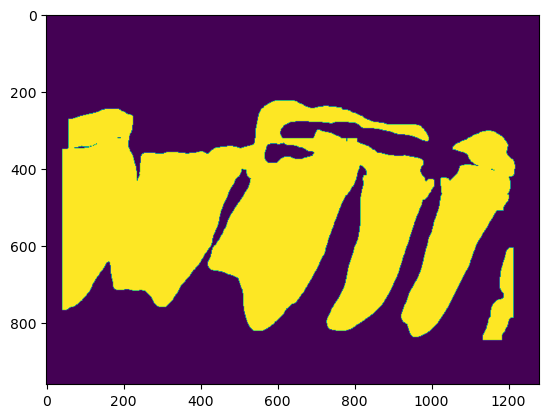

遮罩圖片已保存至 C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\dentin\mask_caries-0.845815-33-1214_1_2022041830.png
正在處理: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\caries-0.6741573-260-760_1_2022052768.png

0: 480x640 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 1 Pulp, 1 Restoration, 1 Background, 136.2ms
Speed: 3.0ms preprocess, 136.2ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Dentin, 1 Background, 184.0ms
Speed: 4.0ms preprocess, 184.0ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)


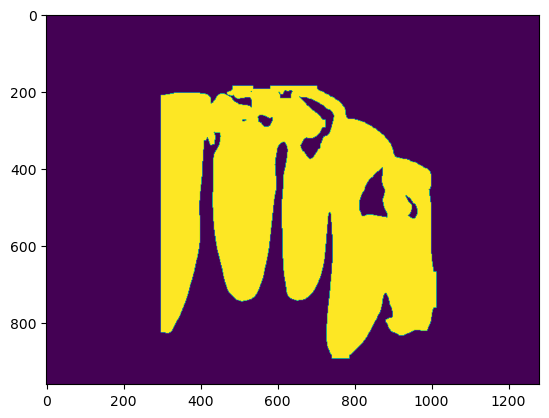

遮罩圖片已保存至 C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\dentin\mask_caries-0.6741573-260-760_1_2022052768.png
正在處理: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\caries-0.8304498-273-734_1_2022041847.png

0: 480x640 1 Alveolar_bone, 1 Dentin, 1 Enamel, 1 Pulp, 1 Restoration, 1 Background, 194.1ms
Speed: 4.0ms preprocess, 194.1ms inference, 8.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Dentin, 1 Background, 201.4ms
Speed: 4.0ms preprocess, 201.4ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)


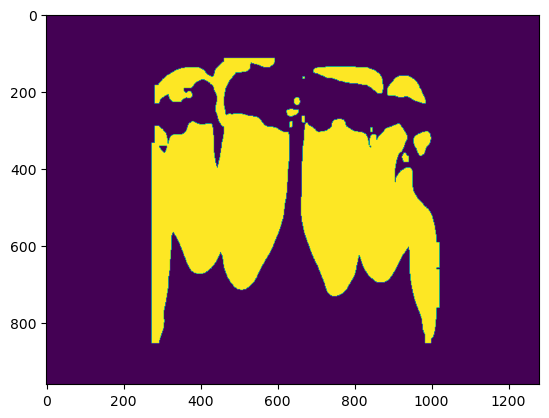

遮罩圖片已保存至 C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\dentin\mask_caries-0.8304498-273-734_1_2022041847.png
正在處理: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\caries-0.8421053-22-1236_0_2022052776.png

0: 480x640 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 1 Pulp, 1 Restoration, 1 Background, 105.3ms
Speed: 2.0ms preprocess, 105.3ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Dentin, 1 Background, 172.6ms
Speed: 5.0ms preprocess, 172.6ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)


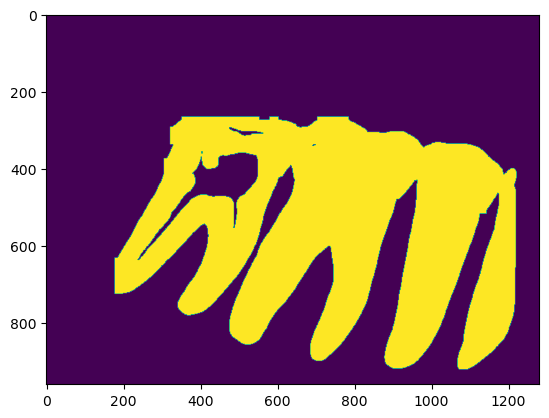

遮罩圖片已保存至 C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\dentin\mask_caries-0.8421053-22-1236_0_2022052776.png
正在處理: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\caries-0.8480566-33-1214_0_2022042506.png

0: 480x640 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 1 Pulp, 2 Restorations, 1 Background, 205.7ms
Speed: 3.0ms preprocess, 205.7ms inference, 9.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Dentin, 1 Background, 230.9ms
Speed: 5.1ms preprocess, 230.9ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)


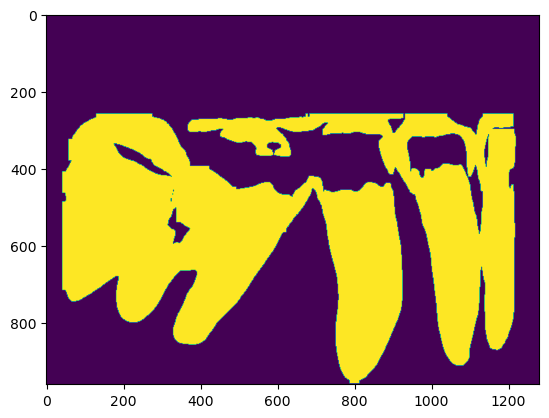

遮罩圖片已保存至 C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\dentin\mask_caries-0.8480566-33-1214_0_2022042506.png
正在處理: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\caries-0.8510638-268-743_1_2022060601150.png

0: 480x640 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 1 Pulp, 1 Background, 104.5ms
Speed: 2.0ms preprocess, 104.5ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Dentin, 1 Background, 174.7ms
Speed: 5.0ms preprocess, 174.7ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)


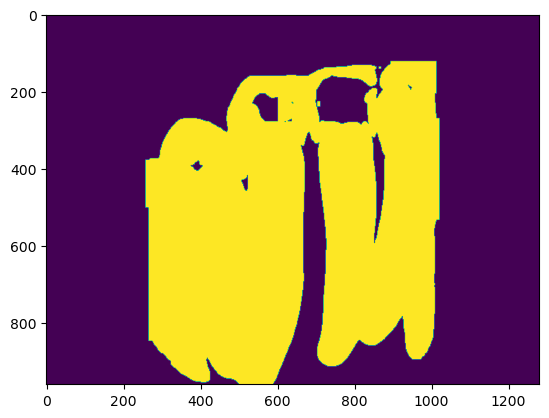

遮罩圖片已保存至 C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\dentin\mask_caries-0.8510638-268-743_1_2022060601150.png
正在處理: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\caries-0.8510638-268-743_1_2022060601151.png

0: 480x640 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 1 Pulp, 3 Restorations, 1 Background, 120.2ms
Speed: 3.0ms preprocess, 120.2ms inference, 8.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Dentin, 1 Background, 180.4ms
Speed: 2.0ms preprocess, 180.4ms inference, 8.0ms postprocess per image at shape (1, 3, 480, 640)


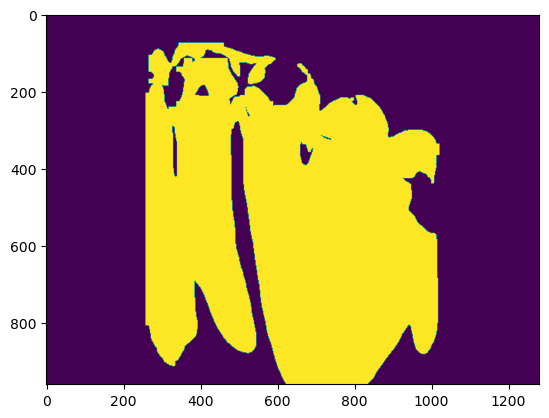

遮罩圖片已保存至 C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\dentin\mask_caries-0.8510638-268-743_1_2022060601151.png
正在處理: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\caries-0.8510638-270-740_1_2022012069.png

0: 480x640 1 Alveolar_bone, 1 Dentin, 1 Enamel, 1 Pulp, 1 Restoration, 1 Background, 100.3ms
Speed: 2.0ms preprocess, 100.3ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Dentin, 1 Background, 175.9ms
Speed: 3.0ms preprocess, 175.9ms inference, 5.1ms postprocess per image at shape (1, 3, 480, 640)


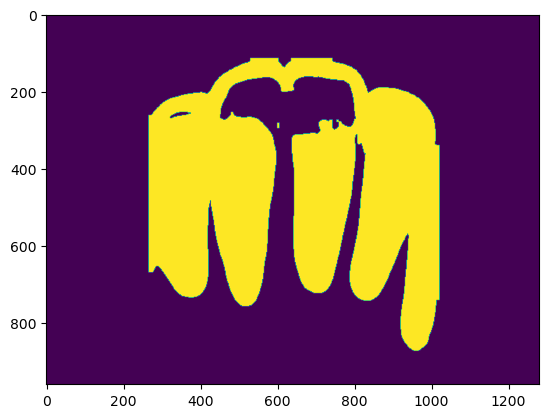

遮罩圖片已保存至 C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\dentin\mask_caries-0.8510638-270-740_1_2022012069.png
正在處理: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\caries-0.8510638-270-740_1_2022030743.png

0: 480x640 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 2 Periapical_lesions, 1 Pulp, 1 Restoration, 1 Root_canal_filling, 1 Background, 133.4ms
Speed: 2.3ms preprocess, 133.4ms inference, 10.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Dentin, 1 Background, 150.6ms
Speed: 3.4ms preprocess, 150.6ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)


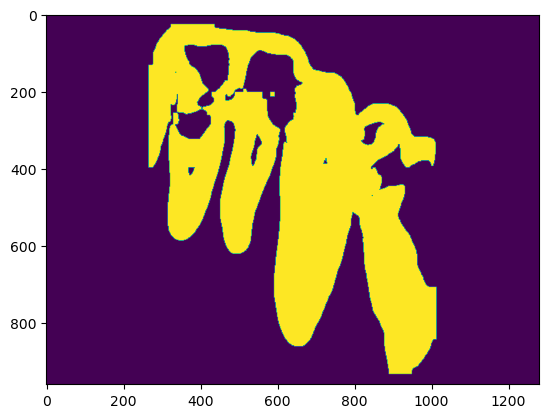

遮罩圖片已保存至 C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\dentin\mask_caries-0.8510638-270-740_1_2022030743.png
正在處理: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\caries-0.8510638-271-738_0_2022060601156.png

0: 480x640 1 Alveolar_bone, 1 Caries, 1 Dentin, 1 Enamel, 1 Pulp, 1 Background, 120.4ms
Speed: 2.1ms preprocess, 120.4ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Dentin, 1 Background, 181.7ms
Speed: 3.0ms preprocess, 181.7ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)


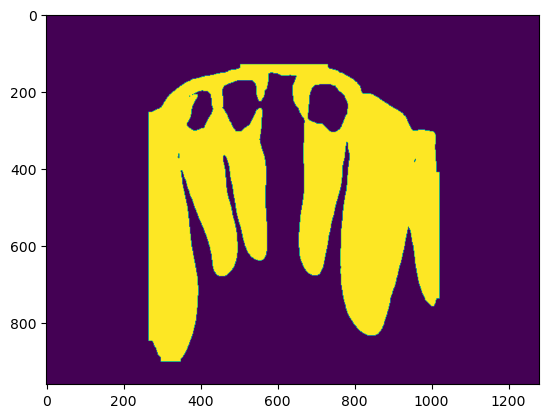

遮罩圖片已保存至 C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\dentin\mask_caries-0.8510638-271-738_0_2022060601156.png


In [3]:
import cv2
import numpy as np
import os
import natsort
import matplotlib.pyplot as plt
from ultralytics import YOLO
from scipy.ndimage import binary_fill_holes

# 加載兩個 YOLO 模型
model = YOLO('dentistry_yolov8n-seg_tuningBest3-7-13_20240825_4.34.pt')
model2 = YOLO('dentistry_yolov8n-seg_all_20240807_4.32.pt')

# 檢查模型1的標籤
print("Model 1 Labels (Classes):")
print(model.names)

# 檢查模型2的標籤
print("\nModel 2 Labels (Classes):")
print(model2.names)

# 定義標題和描述
title = "牙科模型分割示範"
description = "輸入一張圖片並獲取分割結果"

def find_center_mask(mask_binary):
    moments = cv2.moments(mask_binary)
    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
    else:
        cx, cy = None, None
    return (cx, cy)

def reduce_brightness_by_half(image, color):
    mean_brightness = np.mean(image)
    if mean_brightness <= 120:
        scale_factor = 0.8
    elif 120 < mean_brightness <= 150:
        scale_factor = 0.6
    elif mean_brightness > 150:
        scale_factor = 0.4
    else:
        scale_factor = 1.0

    adjusted_color = np.clip(np.array(color) * scale_factor, 0, 255).astype(np.uint8)
    return adjusted_color, mean_brightness, scale_factor

def fill_missing_with_dentin(image, dentin_color=[29, 41, 113]):
    mask = cv2.inRange(image, np.array([50, 50, 50]), np.array([0, 0, 200]))
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        fill_mask = np.zeros_like(image)
        cv2.drawContours(fill_mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
        image[fill_mask == 255] = dentin_color
    
    return image

def colorize_mask(image, file_path, log_file):
    file_name = os.path.basename(file_path)
    if file_name.startswith("processed_"):
        file_name = file_name[len("processed_"):]
    if file_name.endswith(".png"):
        file_name = file_name[:-len(".png")]

    plot_image = image.copy()
    color_list = [
        [255, 240, 0], [0, 127, 65], [255, 0, 0], [29, 41, 113],
        [135, 21, 122], [242, 148, 0], [234, 84, 4], [178, 208, 0],
        [148, 97, 52], [121, 121, 121], [27, 149, 212], [255, 171, 206],
        [216, 28, 110]
    ]

    adjusted_color_list = []
    mean_brightness_total = 0
    for color in color_list:
        adjusted_color, mean_brightness, scale_factor = reduce_brightness_by_half(image, color)
        adjusted_color_list.append(adjusted_color)
        mean_brightness_total += mean_brightness

    mean_brightness_avg = mean_brightness_total / len(color_list)
    with open(log_file, 'a') as f:
        f.write(f"{file_name}\n")
        f.write(f"平均亮度: {mean_brightness_avg}\n")
        f.write(f"scale_factor: {scale_factor}\n\n")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image)
    results2 = model2(image)

    return plot_image

def return_mask_colored(model, image, color_dict, mask_colored, target_labels=['Background']):
    results = model(image)
    class_names = model.names
    kernel = np.ones((5, 5), np.uint8)

    for result in results:
        boxes = result.boxes
        masks = result.masks

        if masks is not None:
            for (mask, box) in zip(masks.data, boxes):
                class_id = int(box.cls)
                class_name = class_names[class_id]
                mask_np = mask.cpu().numpy()
                mask_np = cv2.resize(mask_np, (image.shape[1], image.shape[0]))
                mask_binary = (mask_np > 0.5).astype(np.uint8) * 255

                if np.sum(mask_binary) == 0:
                    continue

                mask_binary = cv2.dilate(mask_binary, kernel, iterations=1)

                flood_fill_mask = mask_binary.copy()
                h, w = flood_fill_mask.shape[:2]
                mask_floodfill = np.zeros((h + 2, w + 2), np.uint8)
                cv2.floodFill(flood_fill_mask, mask_floodfill, (0, 0), 255)
                flood_fill_mask_inv = cv2.bitwise_not(flood_fill_mask)
                mask_filled = mask_binary | flood_fill_mask_inv

                if class_name in target_labels:
                    mask_colored[mask_filled == 255] = color_dict[class_name]
    
    return mask_colored

def process_all_images_in_folder(folder_path, log_file):
    """
    讀取資料夾中的所有 PNG 圖片，並依自然排序處理每張圖片。
    """
    image_files = natsort.natsorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    
    for image_file in image_files:
        file_path = os.path.join(folder_path, image_file)
        print(f"正在處理: {file_path}")
        img = cv2.imread(file_path)
        
        if img is not None:
            mask_colored = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
            color_dict = {
                'Alveolar_bone': [255, 240, 0],
                'Caries': [0, 127, 65],
                'Crown': [255, 0, 0],
                'Dentin': [29, 41, 113],
                'Enamel': [135, 21, 122],
                'Implant': [242, 148, 0],
                'Mandibular_alveolar_nerve': [234, 84, 4],
                'Maxillary_sinus': [178, 208, 0],
                'Molar_bone': [148, 97, 52],
                'Post_and_Core': [121, 121, 121],
                'Pulp': [27, 149, 212],
                'Restoration': [255, 171, 206],
                'Root_canal_filling': [216, 28, 110]
            }

            # 保護Dentin
            mask_colored = return_mask_colored(model2, img, color_dict, mask_colored, target_labels=['Enamel', 'Caries'])
            mask_colored = return_mask_colored(model, img, color_dict, mask_colored, target_labels=['Dentin'])
            mask_2d = np.any(mask_colored != 0, axis=-1).astype(np.uint8)

            # 填充漏洞
            # mask_2d = binary_fill_holes(mask_2d, structure=np.ones((3, 3)))
            plt.imshow(mask_2d)
            plt.show()

            # 檢查並創建輸出資料夾
            output_dir = os.path.join(os.path.dirname(file_path), "dentin")
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)

            # 保存處理後的圖片
            # 保存二值化的遮罩結果
            output_mask_path = os.path.join(output_dir, f"mask_{os.path.basename(file_path)}")
            cv2.imwrite(output_mask_path, mask_2d * 255)  # 將mask_2d乘以255轉換成可視範圍
            print(f"遮罩圖片已保存至 {output_mask_path}")


# 指定資料夾路徑
input_dir = r"C:\Users\SSTek\Desktop\LianChia\test\imgv0.2"
log_dir = os.path.join(os.path.dirname(input_dir), "log")
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
log_file = os.path.join(log_dir, "log.txt")

# 處理指定資料夾中的所有圖片
process_all_images_in_folder(input_dir, log_file)


## 取牙齦

In [ ]:
import cv2
import numpy as np
import os
import natsort
import matplotlib.pyplot as plt
from ultralytics import YOLO
from scipy.ndimage import binary_fill_holes

# 加載兩個 YOLO 模型
model = YOLO('dentistry_yolov8n-seg_tuningBest3-7-13_20240825_4.34.pt')
model2 = YOLO('dentistry_yolov8n-seg_all_20240807_4.32.pt')

# # 檢查模型1的標籤
# print("Model 1 Labels (Classes):")
# print(model.names)

# # 檢查模型2的標籤
# print("\nModel 2 Labels (Classes):")
# print(model2.names)

# 定義標題和描述
title = "牙科模型分割示範"
description = "輸入一張圖片並獲取分割結果"

def find_center_mask(mask_binary):
    moments = cv2.moments(mask_binary)
    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
    else:
        cx, cy = None, None
    return (cx, cy)

def reduce_brightness_by_half(image, color):
    mean_brightness = np.mean(image)
    if mean_brightness <= 120:
        scale_factor = 0.8
    elif 120 < mean_brightness <= 150:
        scale_factor = 0.6
    elif mean_brightness > 150:
        scale_factor = 0.4
    else:
        scale_factor = 1.0

    adjusted_color = np.clip(np.array(color) * scale_factor, 0, 255).astype(np.uint8)
    return adjusted_color, mean_brightness, scale_factor

def fill_missing_with_dentin(image, dentin_color=[29, 41, 113]):
    mask = cv2.inRange(image, np.array([50, 50, 50]), np.array([0, 0, 200]))
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        fill_mask = np.zeros_like(image)
        cv2.drawContours(fill_mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
        image[fill_mask == 255] = dentin_color
    
    return image

def colorize_mask(image, file_path, log_file):
    file_name = os.path.basename(file_path)
    if file_name.startswith("processed_"):
        file_name = file_name[len("processed_"):]
    if file_name.endswith(".png"):
        file_name = file_name[:-len(".png")]

    plot_image = image.copy()
    color_list = [
        [255, 240, 0], [0, 127, 65], [255, 0, 0], [29, 41, 113],
        [135, 21, 122], [242, 148, 0], [234, 84, 4], [178, 208, 0],
        [148, 97, 52], [121, 121, 121], [27, 149, 212], [255, 171, 206],
        [216, 28, 110]
    ]

    adjusted_color_list = []
    mean_brightness_total = 0
    for color in color_list:
        adjusted_color, mean_brightness, scale_factor = reduce_brightness_by_half(image, color)
        adjusted_color_list.append(adjusted_color)
        mean_brightness_total += mean_brightness

    mean_brightness_avg = mean_brightness_total / len(color_list)
    with open(log_file, 'a') as f:
        f.write(f"{file_name}\n")
        f.write(f"平均亮度: {mean_brightness_avg}\n")
        f.write(f"scale_factor: {scale_factor}\n\n")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image)
    results2 = model2(image)

    return plot_image

def return_mask_colored(model, image, color_dict, mask_colored, target_labels=['Background']):
    results = model(image)
    class_names = model.names
    kernel = np.ones((5, 5), np.uint8)

    for result in results:
        boxes = result.boxes
        masks = result.masks

        if masks is not None:
            for (mask, box) in zip(masks.data, boxes):
                class_id = int(box.cls)
                class_name = class_names[class_id]
                mask_np = mask.cpu().numpy()
                mask_np = cv2.resize(mask_np, (image.shape[1], image.shape[0]))
                mask_binary = (mask_np > 0.5).astype(np.uint8) * 255

                if np.sum(mask_binary) == 0:
                    continue

                mask_binary = cv2.dilate(mask_binary, kernel, iterations=1)

                flood_fill_mask = mask_binary.copy()
                h, w = flood_fill_mask.shape[:2]
                mask_floodfill = np.zeros((h + 2, w + 2), np.uint8)
                cv2.floodFill(flood_fill_mask, mask_floodfill, (0, 0), 255)
                flood_fill_mask_inv = cv2.bitwise_not(flood_fill_mask)
                mask_filled = mask_binary | flood_fill_mask_inv

                if class_name in target_labels:
                    mask_colored[mask_filled == 255] = color_dict[class_name]
    
    return mask_colored

def process_all_images_in_folder(folder_path, log_file):
    """
    讀取資料夾中的所有 PNG 圖片，並依自然排序處理每張圖片。
    """
    image_files = natsort.natsorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    
    for image_file in image_files:
        file_path = os.path.join(folder_path, image_file)
        print(f"正在處理: {file_path}")
        img = cv2.imread(file_path)
        
        if img is not None:
            mask_colored = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
            color_dict = {
                'Alveolar_bone': [255, 240, 0],
                'Caries': [0, 127, 65],
                'Crown': [255, 0, 0],
                'Dentin': [29, 41, 113],
                'Enamel': [135, 21, 122],
                'Implant': [242, 148, 0],
                'Mandibular_alveolar_nerve': [234, 84, 4],
                'Maxillary_sinus': [178, 208, 0],
                'Molar_bone': [148, 97, 52],
                'Post_and_Core': [121, 121, 121],
                'Pulp': [27, 149, 212],
                'Restoration': [255, 171, 206],
                'Root_canal_filling': [216, 28, 110]
            }

            # 保護Alveolar_bone
            mask_colored = return_mask_colored(model2, img, color_dict, mask_colored, target_labels=['Alveolar_bone'])
            mask_colored = return_mask_colored(model, img, color_dict, mask_colored, target_labels=['Alveolar_bone'])
            mask_2d = np.any(mask_colored != 0, axis=-1).astype(np.uint8)

            # 填充漏洞
            # mask_2d = binary_fill_holes(mask_2d, structure=np.ones((3, 3)))
            plt.imshow(mask_2d)
            plt.show()

            # 檢查並創建輸出資料夾
            output_dir = os.path.join(os.path.dirname(file_path), "Alveolar_bone")
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)

            # 保存處理後的圖片
            # 保存二值化的遮罩結果
            output_mask_path = os.path.join(output_dir, f"mask_{os.path.basename(file_path)}")
            cv2.imwrite(output_mask_path, mask_2d * 255)  # 將mask_2d乘以255轉換成可視範圍
            print(f"遮罩圖片已保存至 {output_mask_path}")


# 指定資料夾路徑
input_dir = r"C:\Users\SSTek\Desktop\LianChia\test\imgv0.2"
log_dir = os.path.join(os.path.dirname(input_dir), "log")
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
log_file = os.path.join(log_dir, "log.txt")

# 處理指定資料夾中的所有圖片
process_all_images_in_folder(input_dir, log_file)


正在處理: C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\caries-0.845815-33-1214_1_2022041830.png

0: 480x640 1 Alveolar_bone, 1 Crown, 1 Dentin, 1 Enamel, 1 Maxillary_sinus, 1 Pulp, 1 Restoration, 1 Background, 122.8ms
Speed: 2.0ms preprocess, 122.8ms inference, 10.0ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
def show_img_by_path(img_path):
    test_img=cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    plt.imshow(test_img)
    plt.show()
show_img_by_path('imgv0.2/dentin/mask_caries-0.6741573-260-760_1_2022052768.png')

## YOLO上色

In [ ]:
import cv2
import numpy as np
import re, os
import natsort
import matplotlib.pyplot as plt
from ultralytics import YOLO
# 加載 YOLO 模型
model = YOLO('dentistry_yolov8n-seg_all_20240807_4.32.pt')

# 指定亮度記錄文件
log_dir = os.path.join(os.path.dirname(input_dir),"log")
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
log_file = os.path.join(log_dir, "log.txt")

# 定義標題和描述
title = "牙科模型分割示範"
description = "輸入一張圖片並獲取分割結果"

def find_center_mask(mask_binary):
    """
    找到二值掩膜的質心（中心點）。
    """
    moments = cv2.moments(mask_binary)
    if moments['m00'] != 0:  # 確保掩膜不全為零
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
    else:
        cx, cy = None, None  # 如果掩膜全為零
    return (cx, cy)

def reduce_brightness_by_half(image, color):
    """
    根據圖像的平均亮度動態調整RGB顏色的亮度。
    
    :param image: 用於計算平均亮度的圖像（灰度圖或RGB圖像）
    :param color: 要調整的RGB顏色，例如 [255, 240, 0]
    :return: 根據平均亮度調整後的RGB顏色，並返回平均亮度和scale_factor
    """
    # 計算圖片的平均亮度
    mean_brightness = np.mean(image)
    

    # 根據平均亮度動態調整顏色的亮度
    if mean_brightness <= 120:
        scale_factor = 0.8  # 當亮度較低時，減少顏色亮度 
    if 120< mean_brightness <= 150:
        scale_factor = 0.6  # 當亮度較低時，減少顏色亮度
    if mean_brightness > 150:
        scale_factor = 0.4  # 當亮度較高時，進一步減少顏色亮度
    else:
        scale_factor = 1.0  # 在平均亮度時，保持原有亮度

    # 調整顏色亮度
    adjusted_color = np.clip(np.array(color) * scale_factor, 0, 255).astype(np.uint8)
    return adjusted_color, mean_brightness, scale_factor

def fill_missing_with_dentin(image, dentin_color=[29, 41, 113]):
    """
    將未填充的區域使用dentin顏色填充。
    """
    # 找出指定顏色範圍內的未填充區域
    mask = cv2.inRange(image, np.array([50, 50, 50]), np.array([0, 0, 200]))
    
    # 找到這些區域的輪廓
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    for contour in contours:    
        # 建立一個用於填充的掩膜
        fill_mask = np.zeros_like(image)
        cv2.drawContours(fill_mask, [contour], -1, (255, 255, 255), thickness= cv2.FILLED )
        
        # 將填充區域設為dentin_color
        image[fill_mask == 255] = dentin_color
    
    return image

def colorize_mask(image, file_path, log_file):
    """
    使用YOLO模型對圖像進行分割，並調整亮度和填充未填滿的區域。
    
    :param image: 輸入的圖像
    :param file_path: 圖像的文件路徑
    :param log_file: 記錄亮度和scale_factor的文件
    :return: 處理後的圖像
    """
    # 取得檔案名稱，並移除 "processed_"
    file_name = os.path.basename(file_path)
    if file_name.startswith("processed_"):
        file_name = file_name[len("processed_"):]
    if file_name.endswith(".png"):
        file_name = file_name[:-len(".png")]
    # 定義調整後的顏色列表
    plot_image = image.copy()
    color_list = [ #用於labels
        [255, 240, 0],  # Alveolar_bone
        [0, 127, 65],   # Caries
        [255, 0, 0],    # Crown
        [29, 41, 113],  # Dentin
        [135, 21, 122], # Enamel
        [242, 148, 0],  # Implant
        [234, 84, 4],   # Mandibular_alveolar_nerve
        [178, 208, 0],  # Maxillary_sinus
        [148, 97, 52],  # Molar_bone
        [121, 121, 121],# Post_and_Core
        [27, 149, 212], # Pulp
        [255, 171, 206],# Restoration
        [216, 28, 110]  # Root_canal_filling
    ]

    # 根據圖像亮度動態調整顏色
    adjusted_color_list = []
    mean_brightness_total = 0
    for color in color_list:
        adjusted_color, mean_brightness, scale_factor = reduce_brightness_by_half(image, color)
        adjusted_color_list.append(adjusted_color)
        mean_brightness_total += mean_brightness
    print(f"圖片的平均亮度: {mean_brightness}")
    color_dict = {i: color for i, color in enumerate(adjusted_color_list)}

    # 記錄亮度和scale_factor
    file_name = os.path.basename(file_path)
    mean_brightness_avg = mean_brightness_total / len(color_list)
    with open(log_file, 'a') as f:
        f.write(f"{file_name}\n")
        f.write(f"平均亮度: {mean_brightness_avg}\n")
        f.write(f"scale_factor: {scale_factor}\n\n")

    # 將圖像轉換為RGB格式，以適應YOLO模型
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image)

    class_names = model.names
    kernel = np.ones((5, 5), np.uint8)  # 用於膨脹操作的內核

    for result in results:
        boxes = result.boxes
        masks = result.masks

        if masks is not None:
            for (mask, box) in zip(masks.data, boxes):
                class_id = int(box.cls)
                class_name = class_names[class_id]

                mask_np = mask.cpu().numpy()
                mask_np = cv2.resize(mask_np, (image.shape[1], image.shape[0]))
                mask_binary = (mask_np > 0.5).astype(np.uint8) * 255

                if np.sum(mask_binary) == 0:
                    continue

                # 添加膨脹操作以擴展遮罩
                mask_binary = cv2.dilate(mask_binary, kernel, iterations = 2)

                # 使用洪水填充填補孔洞
                flood_fill_mask = mask_binary.copy()
                h, w = flood_fill_mask.shape[:2]
                mask_floodfill = np.zeros((h + 2, w + 2), np.uint8)
                cv2.floodFill(flood_fill_mask, mask_floodfill, (0, 0), 255)
                flood_fill_mask_inv = cv2.bitwise_not(flood_fill_mask)
                mask_filled = mask_binary | flood_fill_mask_inv

                mask_colored = np.zeros((mask_filled.shape[0], mask_filled.shape[1], 3), dtype=np.uint8)
                if class_name != 'Background':
                    mask_colored[mask_filled == 255] = color_dict[class_id]
                    plot_image = cv2.addWeighted(plot_image, 1, mask_colored, 0.8, 0)

    # 使用dentin顏色填充未填滿的區域
    dentin_color = color_dict[3]  # Dentin的顏色
    plot_image = fill_missing_with_dentin(plot_image, dentin_color)

    number = re.search(r'\d+', file_name).group()
    output_dir = os.path.join(os.path.dirname(file_path), "AIv0.2")
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    # 保存處理後的圖片
    output_path = os.path.join(output_dir, f"AI_{file_name}")
    plot_image_bgr = cv2.cvtColor(plot_image, cv2.COLOR_RGB2BGR)  # 將RGB轉換回BGR以便使用OpenCV保存
    # 檢查目錄是否存在，如果不存在則創建該目錄
    
    cv2.imwrite(output_path, plot_image_bgr)
    print(f"圖片已保存至 {output_path}")

    return plot_image

def process_all_images_in_folder(folder_path, log_file):
    """
    讀取資料夾中的所有 PNG 圖片，並依自然排序處理每張圖片。
    
    :param folder_path: 包含 PNG 圖片的資料夾路徑
    :param log_file: 記錄亮度和scale_factor的文件
    """
    # 獲取資料夾中所有 PNG 檔案，並按自然順序排序
    image_files = natsort.natsorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    # 逐一處理每張圖片
    for image_file in image_files:
        file_path = os.path.join(folder_path, image_file)
        print(f"正在處理: {file_path}")
        img = cv2.imread(file_path)
        colorize_mask(img, file_path, log_file)


# 處理指定資料夾中的所有圖片
process_all_images_in_folder(input_dir, log_file)

## 後處裡

In [ ]:
import cv2
import numpy as np
import os
import natsort

image_dir = r'C:\Users\SSTek\Desktop\LianChia\test\imgv0.2'
# 輸入
inference_image_dir = os.path.join(image_dir, "AIv0.2")
# 推論AI結果的輸入資料夾
#output_dir = os.path.join(image_dir, "output")
# 輸出資料夾
mask_dir = os.path.join(image_dir, "testv0.2")
# 遮罩（黑白圖）
os.makedirs(mask_dir,exist_ok=True)

# 取得並排序原始圖像和推理圖像的 PNG 文件名
image_files = natsort.natsorted([f for f in os.listdir(image_dir) if f.endswith('.png') and os.path.isfile(os.path.join(image_dir, f))])
inference_files = natsort.natsorted([f for f in os.listdir(inference_image_dir) if f.endswith('.png') and os.path.isfile(os.path.join(inference_image_dir, f))])

# 確保原始圖像和推理圖像的數量一致
if len(image_files) != len(inference_files):
    print("原始圖像文件數量和推理圖像文件數量不匹配。")
    exit()

# 迴圈處理所有圖像文件
for img_idx, image_file in enumerate(image_files):
    input_dir = os.path.join(image_dir, image_file)
    inference_image_path = os.path.join(inference_image_dir, inference_files[img_idx])
    
    # 讀取原始圖像，確保可以處理中文檔名
    img = cv2.imdecode(np.fromfile(input_dir, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
    if img is None:
        print(f"無法讀取圖片: {input_dir}")
        continue
    
    # 轉換為灰階圖像
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 定義HSV範圍
    hsv_lower_bound = np.array([0, 0, 31])
    hsv_upper_bound = np.array([0, 0, 154])

    # 轉換為HSV圖像
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 計算在特定HSV範圍內的像素數量
    HSV_mask = cv2.inRange(hsv_image, hsv_lower_bound, hsv_upper_bound)
    pixels_in_range = cv2.countNonZero(HSV_mask)

    # 初始化 replaced_mask
    replaced_mask = np.zeros_like(gray_image)
    if 880000 > pixels_in_range >= 620000:
        print(f"Stage1: {input_dir}")
        threshold_value_white = 20
    elif pixels_in_range >= 880000:
        print(f"Stage2: {input_dir}")
        threshold_value_white = 11
    else:
        print(f"Stage3: {input_dir}")
        threshold_value_white = 220

    # 處理高於閾值的像素
    image_replaced = np.where(img > threshold_value_white, 128, img)
    replaced_mask = ((img > threshold_value_white)).astype(np.uint8)
    replaced_mask = replaced_mask * 255
    gray_image = cv2.cvtColor(image_replaced, cv2.COLOR_BGR2GRAY)

    # 使用 Otsu's 方法進行二值化
    _, binarized_image_otsu = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 創建黑色遮罩
    black_mask = np.zeros_like(img)
    black_mask[binarized_image_otsu == 0] = [0, 0, 0]  # 黑色區域
    black_mask[binarized_image_otsu == 255] = [255, 255, 255]  # 白色區域
    black_mask[replaced_mask == 255] = [255]  # 使用白色表示被替換的區域

    # 閉運算內核
    kernel = np.ones((5, 5), np.uint8)  
    # 閉運算
    closing = cv2.morphologyEx(black_mask, cv2.MORPH_CLOSE, kernel)

    # 找到遮罩中的所有輪廓
    contours, _ = cv2.findContours(cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # 遍歷所有輪廓，根據面積和顏色進行填充
    for contour in contours:
        area = cv2.contourArea(contour)
        mask = np.zeros_like(gray_image)
        cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
        
        # 計算輪廓內部的平均顏色
        mean_val = cv2.mean(gray_image, mask=mask)[0]
        
        if area < 900 and mean_val > 128:  # 白色區域（平均值接近255）
            print(f"填充面積小於900的白色區域為黑色，面積為: {area}")
            cv2.drawContours(closing, [contour], -1, (0, 0, 0), thickness=cv2.FILLED)  # 將面積小於900的白色區域填滿黑色
        elif area < 600 and mean_val <= 128:  # 黑色區域（平均值接近0）
            print(f"填充面積小於600的黑色區域為白色，面積為: {area}")
            cv2.drawContours(closing, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)  # 將面積小於600的黑色區域填滿白色
    
    # 獲取文件名稱（去除.png後綴）
    base_filename = os.path.splitext(image_file)[0]

    # 保存遮罩圖像以供檢查
    mask_output_image_path = os.path.join(mask_dir, f"{base_filename}_mask.png")
    cv2.imencode('.png', closing)[1].tofile(mask_output_image_path)
    print(f"保存mask圖像到: {mask_output_image_path}")

    # 讀取對應的推理圖像
    inference_image = cv2.imdecode(np.fromfile(inference_image_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
    if inference_image is None:
        print(f"無法讀取推理圖片: {inference_image_path}")
        continue

    # 將 closing 轉換為灰度圖像
    closing_gray = cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY)
    # 將黑色遮罩應用到推理圖像上
    inference_image[closing_gray == 0] = [0]  # 只覆蓋黑色部分

## b - (a ∩ b)

In [15]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import glob

# # 定義輸入資料夾和輸出資料夾路徑
# a_folder = 'D:/MCUT/SSTek/test/imgv0.2/dentin'
# b_folder = 'D:/MCUT/SSTek/test/imgv0.2/Maskv0.2'
# output_folder = 'D:/MCUT/SSTek/test/imgv0.2/fin_mask'

# # 確保輸出資料夾存在，若無則創建
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # 讀取資料夾中的所有 PNG 圖片
# a_images = glob.glob(os.path.join(a_folder, "*.png"))
# b_images = glob.glob(os.path.join(b_folder, "*.png"))

# # 確保 a_images 和 b_images 數量一致
# if len(a_images) != len(b_images):
#     raise ValueError("The number of images in the two folders must be the same.")

# # 逐一處理每對圖片
# for a_path, b_path in zip(a_images, b_images):
#     # 讀取圖片 a 和 b
#     a_img = cv2.imread(a_path, cv2.IMREAD_GRAYSCALE)  # a 需要轉換成灰度
#     b_img = cv2.imread(b_path, cv2.IMREAD_GRAYSCALE)  # b 同樣使用灰度

#     # 確保圖片大小相同
#     if a_img.shape != b_img.shape:
#         raise ValueError(f"Images {os.path.basename(a_path)} and {os.path.basename(b_path)} must have the same dimensions")

#     # 創建二值化的遮罩，設定閾值將圖像轉換為二進制
#     _, a_binary = cv2.threshold(a_img, 127, 255, cv2.THRESH_BINARY)
#     _, b_binary = cv2.threshold(b_img, 127, 255, cv2.THRESH_BINARY)

#     # 取交集，得到 a 和 b 的重疊部分
#     intersection = cv2.bitwise_and(a_binary, b_binary)

#     # b 減去交集部分，得到最終結果
#     result = cv2.bitwise_and(b_binary, cv2.bitwise_not(intersection))

#     # 顯示圖片
#     plt.figure(figsize=(12, 4))

#     plt.subplot(1, 3, 1)
#     plt.title('a_binary')
#     plt.imshow(a_binary, cmap='gray')
#     plt.axis('off')  # 隱藏坐標軸

#     plt.subplot(1, 3, 2)
#     plt.title('b_binary')
#     plt.imshow(b_binary, cmap='gray')
#     plt.axis('off')  # 隱藏坐標軸

#     plt.subplot(1, 3, 3)
#     plt.title('Intersection')
#     plt.imshow(intersection, cmap='gray')
#     plt.axis('off')  # 隱藏坐標軸

#     plt.tight_layout()
#     plt.show()

#     # 生成新的檔名並保存結果圖片
#     filename = os.path.basename(b_path)  # 提取 b 的檔名
#     intersection_path = os.path.join(output_folder, f"intersection_{filename}")  # 命名方式：intersection_+原檔名
#     cv2.imwrite(intersection_path, intersection)

# print(f"所有圖片已處理完畢，結果保存到資料夾: {output_folder}")


## 覆蓋圖片

In [ ]:
import cv2
import numpy as np
import os
import natsort

def process_images(inference_dir, teeth_mask_dir, gums_mask_dir, output_dir):
    # 確保輸出目錄存在
    os.makedirs(output_dir, exist_ok=True)

    # 取得並排序文件
    inference_files = natsort.natsorted([f for f in os.listdir(inference_dir) if f.endswith('.png')])
    teeth_mask_files = natsort.natsorted([f for f in os.listdir(teeth_mask_dir) if f.endswith('.png')])
    gums_mask_files = natsort.natsorted([f for f in os.listdir(gums_mask_dir) if f.endswith('.png')])

    # 確保文件數量匹配
    if len(teeth_mask_files) != len(inference_files) or len(gums_mask_files) != len(inference_files):
        print("圖片數量不匹配")
        return

    for inference_file in inference_files:
        # 讀取圖片
        inference_path = os.path.join(inference_dir, inference_file)
        teeth_mask_path = os.path.join(teeth_mask_dir, teeth_mask_files[inference_files.index(inference_file)])
        gums_mask_path = os.path.join(gums_mask_dir, gums_mask_files[inference_files.index(inference_file)])
        
        inference_img = cv2.imread(inference_path, cv2.IMREAD_COLOR)
        teeth_mask_img = cv2.imread(teeth_mask_path, cv2.IMREAD_GRAYSCALE)
        gums_mask_img = cv2.imread(gums_mask_path, cv2.IMREAD_GRAYSCALE)

        if inference_img is None or teeth_mask_img is None or gums_mask_img is None:
            print(f"無法讀取圖片: {inference_file} 或遮罩")
            continue

        # 確保圖片大小一致
        if inference_img.shape[:2] != teeth_mask_img.shape[:2] or inference_img.shape[:2] != gums_mask_img.shape[:2]:
            print(f"圖片大小不匹配: {inference_file}")
            continue

        # 創建結果圖片
        result = np.zeros_like(inference_img)

        # 白色區域的遮罩（牙齒）
        teeth_mask = teeth_mask_img == 255  # 假設牙齒遮罩為白色區域
        # 灰色區域的遮罩（牙齦）
        gums_mask = gums_mask_img == 255  # 假設牙齦遮罩為白色區域

        # 將牙齒區域保留
        result[teeth_mask] = inference_img[teeth_mask]
        # 將牙齦區域保留
        result[gums_mask] = inference_img[gums_mask]

        # 保存結果
        output_path = os.path.join(output_dir, f"processed_{inference_file}")
        cv2.imwrite(output_path, result)
        print(f"已保存處理後的圖片: {output_path}")

def main():
    # 定義路徑
    base_dir = r'C:\Users\SSTek\Desktop\LianChia\test\imgv0.2'
    inference_dir = os.path.join(base_dir, "AIv0.2")
    teeth_mask_dir = os.path.join(base_dir, "dentin")  # 假設牙齒遮罩資料夾
    gums_mask_dir = os.path.join(base_dir, "Alveolar_bone")  # 假設牙齦遮罩資料夾
    output_dir = os.path.join(base_dir, "output")

    process_images(inference_dir, teeth_mask_dir, gums_mask_dir, output_dir)

if __name__ == "__main__":
    main()


In [ ]:
show_img_by_path('imgv0.2/output/processed_AI_caries-0.6741573-260-760_1_2022052768.png')

## Task2

In [ ]:
import cv2
import numpy as np
import json
import os
import natsort

# 設定資料夾路徑
output_image_dir = r"C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\output"
teeth_mask_dir = r"C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\dentin"
gums_mask_dir = r"C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\Alveolar_bone"
json_path = "mask_color_setting.json"
corrected_output_dir = r"C:\Users\SSTek\Desktop\LianChia\test\imgv0.2\output\corrected"

# 確保輸出目錄存在
os.makedirs(corrected_output_dir, exist_ok=True)

# 讀取上色用的 JSON 檔
with open(json_path, 'r') as json_file:
    color_info = json.load(json_file)

# 檢查 color_info 的結構
print(color_info)  # 用來確認 JSON 的結構

# 讀取資料夾中的圖片
output_images = natsort.natsorted([f for f in os.listdir(output_image_dir) if f.endswith(".png")])
teeth_masks = natsort.natsorted([f for f in os.listdir(teeth_mask_dir) if f.endswith(".png")])
gums_masks = natsort.natsorted([f for f in os.listdir(gums_mask_dir) if f.endswith(".png")])  # 讀取牙齦遮罩

# 確保三個資料夾中的文件數量相同
if len(output_images) != len(teeth_masks) or len(output_images) != len(gums_masks):
    print("上色圖片、牙齒遮罩和牙齦遮罩的數量不匹配")
else:
    for img_idx, file in enumerate(output_images):
        # 讀取已上色的圖片和對應的牙齒、牙齦遮罩
        output_image_path = os.path.join(output_image_dir, file)
        teeth_mask_path = os.path.join(teeth_mask_dir, teeth_masks[img_idx])
        gums_mask_path = os.path.join(gums_mask_dir, gums_masks[img_idx])  # 牙齦遮罩

        output_image = cv2.imread(output_image_path, cv2.IMREAD_COLOR)
        teeth_mask = cv2.imread(teeth_mask_path, cv2.IMREAD_GRAYSCALE)
        gums_mask = cv2.imread(gums_mask_path, cv2.IMREAD_GRAYSCALE)  # 讀取牙齦遮罩

        if output_image is None or teeth_mask is None or gums_mask is None:
            print(f"未能加載圖片: {output_image_path} 或 {teeth_mask_path} 或 {gums_mask_path}")
            continue

        # 根據 JSON 檔內的顏色資訊進行填補
        for key, color in color_info["color_dict"].items():
            color = np.array(color, dtype=np.uint8)  # 確保顏色為無符號整數
            region_mask = (teeth_mask == int(key))  # 假設牙齒遮罩中的區域用對應的鍵標記
            
            # 將遮罩區域進行填色，但只在dentin影像中對應位置內
            output_image[region_mask] = color

        # 保留牙齦區域（白色部分）
        gums_region_mask = (gums_mask == 255)  # 假設牙齦遮罩中的區域為白色
        output_image[gums_region_mask] = output_image[gums_region_mask]  # 保留原始顏色或設置成需要的顏色

        # 確保背景區域保持黑色
        background_mask = (teeth_mask == 0) & (gums_mask == 0)  # 背景在牙齒和牙齦都沒有遮罩的區域
        output_image[background_mask] = [0, 0, 0]  # 保持背景黑色

        # 保存最終校正後的圖像
        corrected_image_path = os.path.join(corrected_output_dir, f"corrected_{file}")
        cv2.imwrite(corrected_image_path, output_image)

    print("顏色校正完成。")


In [ ]:
def show_img_by_path(img_path):
    test_img=cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    plt.imshow(test_img)
    plt.show()
show_img_by_path('imgv0.2/output/corrected/corrected_processed_AI_caries-0.6741573-260-760_1_2022052768.png')

## 覆蓋回去最初上色的圖片AIv0.2

In [ ]:
import cv2
import numpy as np
import os
import natsort

def read_image(image_path):
    """讀取圖像檔案，並處理中文檔名"""
    return cv2.imdecode(np.fromfile(image_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)

def is_gray(pixel):
    """判斷一個像素是否接近灰色（RGB 三通道值接近）"""
    return abs(int(pixel[0]) - int(pixel[1])) < 10 and abs(int(pixel[1]) - int(pixel[2])) < 10 and abs(int(pixel[0]) - int(pixel[2])) < 10

def apply_mask(inference_image, mask_image):
    """將遮罩應用到推論圖像上，覆蓋灰色以外的顏色"""
    gray_mask = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)

    # 洪水填充
    mask_binary = cv2.threshold(gray_mask, 1, 255, cv2.THRESH_BINARY)[1]  # 二值化遮罩圖像

    flood_fill_mask = mask_binary.copy()
    h, w = flood_fill_mask.shape[:2]
    mask_floodfill = np.zeros((h + 2, w + 2), np.uint8)
    cv2.floodFill(flood_fill_mask, mask_floodfill, (0, 0), 255)

    # 反轉填充後的圖像，填補黑色空洞
    flood_fill_mask_inv = cv2.bitwise_not(flood_fill_mask)
    mask_filled = mask_binary | flood_fill_mask_inv

    # 將遮罩應用到推理圖像上
    for i in range(mask_image.shape[0]):
        for j in range(mask_image.shape[1]):
            if mask_filled[i, j] == 255:  # 如果左圖是黑色區域
                if not is_gray(inference_image[i, j]):  # 並且右圖不是灰色
                    inference_image[i, j] = mask_image[i, j]  # 覆蓋右圖

    return inference_image

def process_images(mask_dir, inference_dir, output_dir):
    """處理所有圖像，將mask資料夾中的圖像疊加到inference資料夾中的圖像"""
    mask_files = natsort.natsorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])
    inference_files = natsort.natsorted([f for f in os.listdir(inference_dir) if f.endswith('.png')])

    if len(mask_files) != len(inference_files):
        print("原始圖像文件數量和推理圖像文件數量不匹配。")
        return

    os.makedirs(output_dir, exist_ok=True)

    for mask_file, inference_file in zip(mask_files, inference_files):
        mask_image_path = os.path.join(mask_dir, mask_file)
        inference_image_path = os.path.join(inference_dir, inference_file)

        # 讀取遮罩圖像和推論圖像
        mask_image = read_image(mask_image_path)
        inference_image = read_image(inference_image_path)

        if mask_image is None or inference_image is None:
            print(f"無法讀取圖片: {mask_image_path} 或 {inference_image_path}")
            continue

        # 將遮罩應用到推論圖像上
        processed_image = apply_mask(inference_image, mask_image)

        # 獲取基礎文件名（去除.png後綴）並保存結果
        base_filename = os.path.splitext(mask_file)[0]
        output_image_path = os.path.join(output_dir, f"{base_filename}.png")
        cv2.imencode('.png', processed_image)[1].tofile(output_image_path)
        print(f"保存處理後的圖片到: {output_image_path}")

# 設定資料夾路徑
image_dir = r"C:\Users\SSTek\Desktop\LianChia\test\imgv0.2" 
mask_dir = os.path.join(image_dir, "output/corrected")  
inference_dir = os.path.join(image_dir, "AIv0.2")  
output_dir = os.path.join(image_dir, "fin_pic")  

# 開始處理
process_images(mask_dir, inference_dir, output_dir)


In [ ]:
show_img_by_path('imgv0.2/fin_pic/corrected_processed_AI_caries-0.6741573-260-760_1_2022052768.png')

## 計算IOU

In [ ]:
import os
import numpy as np
from PIL import Image
from natsort import natsorted

def calculate_iou(mask1, mask2):
    # IOU計算
    mask1 = np.array(mask1).astype(bool)
    mask2 = np.array(mask2).astype(bool)
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    iou = intersection / union if union != 0 else 0
    return iou

def process_folders(training_folders, validation_folder):
    # 自然排序讀取文件
    validation_files = natsorted(os.listdir(validation_folder))
    all_ious = []
    
    for training_folder in training_folders:
        training_files = natsorted(os.listdir(training_folder))
        
        for train_file in training_files:
            train_path = os.path.join(training_folder, train_file)
            
            for val_file in validation_files:
                val_path = os.path.join(validation_folder, val_file)
                
                try:
                    if train_path.endswith('.png') and val_path.endswith('.png'):
                        mask_train = Image.open(train_path).convert('L')
                        mask_val = Image.open(val_path).convert('L')
                        
                        iou = calculate_iou(mask_train, mask_val)
                        all_ious.append((train_file, val_file, iou, training_folder))
                except Exception as e:
                    print(f"Error processing files {train_file} and {val_file}: {e}")
    
    return all_ious

# 定義訓練集和驗證集的文件夾路徑
training_folders = [
    "C:/Users/SSTek/Desktop/LianChia/test/imgv0.2/Alveolar_bone", 
    "C:/Users/SSTek/Desktop/LianChia/test/imgv0.2/fin_mask"  # 確保這是你的訓練集資料夾的正確路徑
]
validation_folder = "C:/Users/SSTek/Desktop/LianChia/test/imgv0.2/fin_pic"  # 你的驗證集資料夾的正確路徑

# 計算所有文件的 IoU
ious = process_folders(training_folders, validation_folder)

# 輸出每個文件的 IoU
total_iou = 0
for train_file, val_file, iou, training_folder in ious:
    print(f"Training Folder: {training_folder}")  # 訓練集資料夾
    print(f"Valid : {val_file}")  # 驗證集標籤
    print(f"Train : {train_file}")  # 訓練集遮罩
    print(f"IoU: {iou}\n")
    total_iou += iou
    if iou < 0.999:
        print(f"Low IoU Image: {val_file}, IoU: {iou}")

# 計算並輸出平均 IoU
average_iou = total_iou / len(ious) if ious else 0
print(f"Average IoU: {average_iou}")
